In [1]:
import requests 
from bs4 import BeautifulSoup 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = "https://www.mohfw.gov.in/"

In [0]:
content = requests.get(url).content

In [0]:
covid_soup = BeautifulSoup(content, "html.parser")

In [0]:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]

In [0]:
stats = []
all_rows = covid_soup.find_all("tr")
for row in all_rows:
  stat = extract_contents(row.find_all("td"))
  if len(stat) == 5:
    stats.append(stat)

In [0]:
new_col = ["S.No", "STATE/UT", "Confirm_cases", "Recovered_cases", "Fatal_cases"]
state_data = pd.DataFrame(data=stats, columns=new_col)

In [8]:
state_data.head()

,S.No,STATE/UT,Confirm_cases,Recovered_cases,Fatal_cases
0,1,Andaman and Nicobar Islands,33,15,0
1,2,Andhra Pradesh,1403,321,31
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,42,29,1
4,5,Bihar,403,65,2


In [0]:
state_data["Confirm_cases"] = state_data["Confirm_cases"].map(int)
state_data["Recovered_cases"] = state_data["Recovered_cases"].map(int)
state_data["Fatal_cases"] = state_data["Fatal_cases"].map(int)


In [0]:
state_data["Total_cases"] = state_data["Confirm_cases"].sum()
state_data["Total_fatalities"] = state_data["Fatal_cases"].sum()
state_data["Total_recovery"] = state_data["Recovered_cases"].sum()
state_data["Recovery_percentage"] = (state_data["Recovered_cases"]/state_data["Confirm_cases"])*100
state_data["Fatality_percentage"] = (state_data["Fatal_cases"]/state_data["Confirm_cases"])*100

Text(0.5, 1.0, 'Nationwide total Confirmed, Recovered and Deceased Cases')

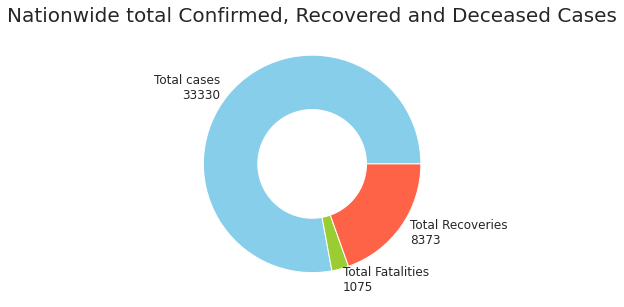

In [22]:
group = [state_data["Total_cases"][0], state_data["Total_fatalities"][0], state_data["Total_recovery"][0]]
group_label = [("Total cases\n"+str(state_data["Total_cases"][0])), 
               ("Total Fatalities\n"+str(state_data["Total_fatalities"][0])),
               "Total Recoveries\n"+str(state_data["Total_recovery"][0])]
custom_colors = ["skyblue","yellowgreen","tomato"]
plt.figure(figsize = (5,5))
plt.pie(group, labels = group_label, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = "white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc("font", size = 12)
plt.title("Nationwide total Confirmed, Recovered and Deceased Cases", fontsize = 20)

In [16]:
state_data.head()

,S.No,STATE/UT,Confirm_cases,Recovered_cases,Fatal_cases,Total_cases,Total_fatalities,Total_recovery,Recovery_percentage,Fatality_percentage
0,1,Andaman and Nicobar Islands,33,15,0,33330,1075,8373,45.454545,0.000000
1,2,Andhra Pradesh,1403,321,31,33330,1075,8373,22.879544,2.209551
2,3,Arunachal Pradesh,1,1,0,33330,1075,8373,100.000000,0.000000
3,4,Assam,42,29,1,33330,1075,8373,69.047619,2.380952
4,5,Bihar,403,65,2,33330,1075,8373,16.129032,0.496278


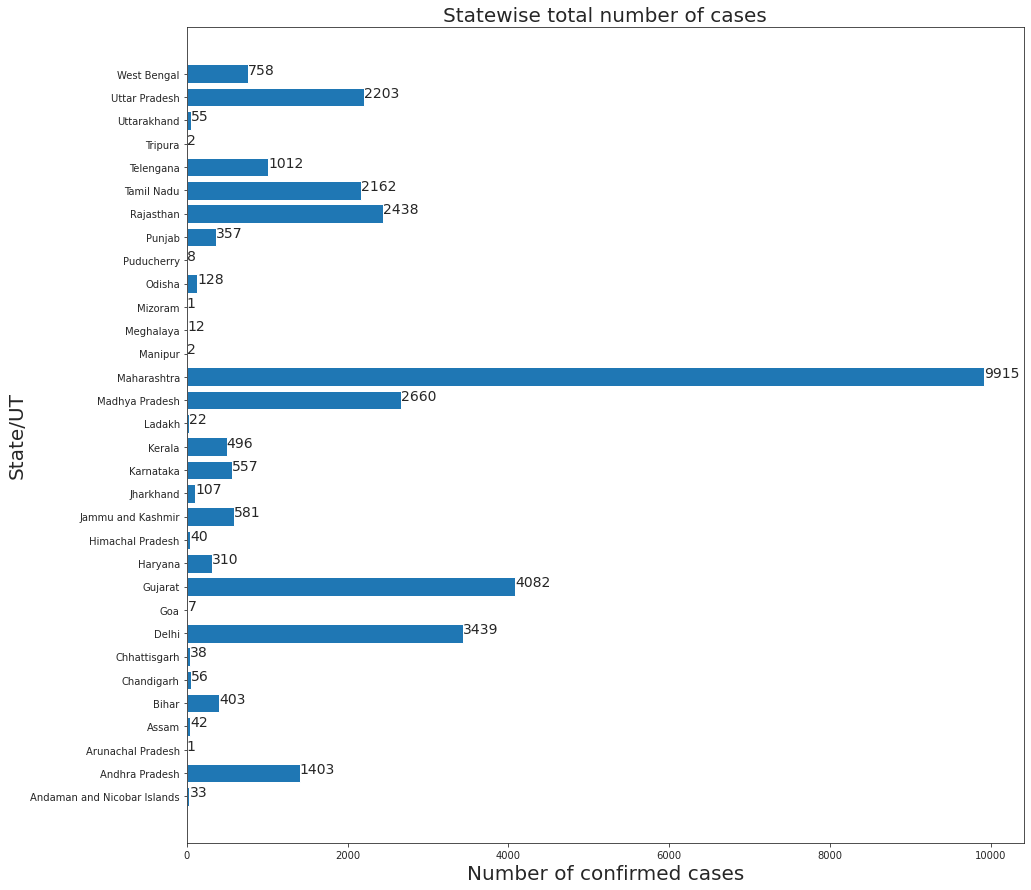

In [12]:
sns.set_style('ticks')
plt.figure(figsize=(15,15))
plt.barh(state_data["STATE/UT"],state_data["Confirm_cases"])
plt.xlabel("Number of confirmed cases", fontsize=20)
plt.ylabel("State/UT", fontsize=20)
plt.title("Statewise total number of cases", fontsize=20)
for index, value in enumerate(state_data["Confirm_cases"]):
  plt.text(value, index, str(value), fontsize=14)
plt.show()

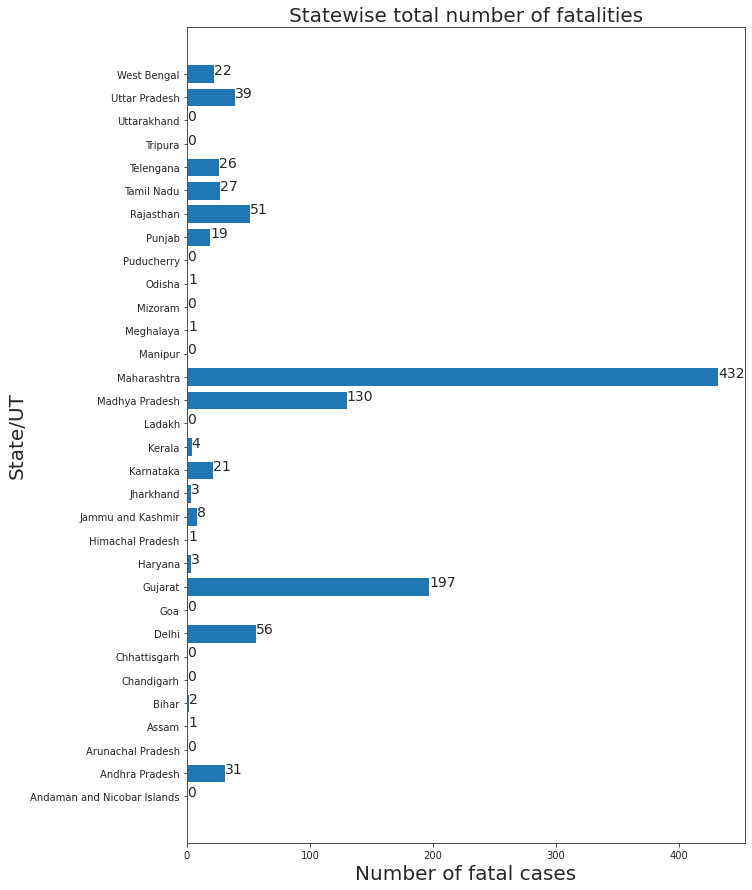

In [13]:
sns.set_style('ticks')
plt.figure(figsize=(10,15))
plt.barh(state_data["STATE/UT"],state_data["Fatal_cases"])
plt.xlabel("Number of fatal cases", fontsize=20)
plt.ylabel("State/UT", fontsize=20)
plt.title("Statewise total number of fatalities", fontsize=20)
for index, value in enumerate(state_data["Fatal_cases"]):
  plt.text(value, index, str(value), fontsize=14)
plt.show()

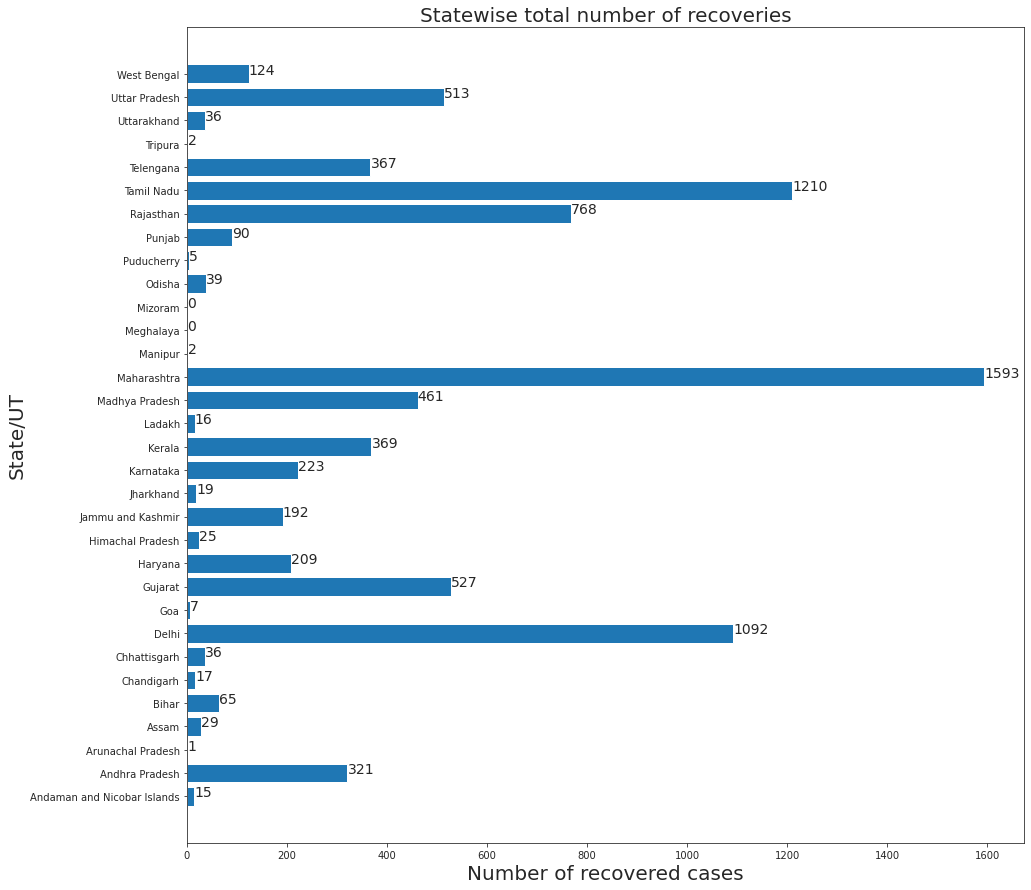

In [14]:
sns.set_style('ticks')
plt.figure(figsize=(15,15))
plt.barh(state_data["STATE/UT"],state_data["Recovered_cases"])
plt.xlabel("Number of recovered cases", fontsize=20)
plt.ylabel("State/UT", fontsize=20)
plt.title("Statewise total number of recoveries", fontsize=20)
for index, value in enumerate(state_data["Recovered_cases"]):
  plt.text(value, index, str(value), fontsize=14)
plt.show()